# Estymacja pozycji (ludzkiego ciała)

* Maciej Aleksandrowicz 2025, Wydział Informatyki AGH,
  * Opracowano na podastawie [tego posta na blogu sigmoidal.ai](https://sigmoidal.ai/en/real-time-human-pose-estimation-using-mediapipe/).


# Zadanie

W ramach dzisiejszych laboratoriów, wcielacie się w rolę naczalnego specjalisty od automatyzacji zliczeń. Wykorzystując podany przykład biblioteki do estymacji pozycji ludzkiego ciała, należy zaprezentować prototyp zastosowania, jakie powtarzalne czynności można zliczać przy pomocy takiej metody.

# Zależności

In [3]:
# Instalacja bibliotek
!pip install --upgrade opencv-contrib-python -q
!pip install mediapipe -q


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
# Import bibliotek
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp

%matplotlib inline

## Modele MediaPipe
Modele dostarczone przez `MediaPipe` są opracowane pod użycie ich na urządzeniu końcowym (trening nie jest wymagany). W ramach dzisiejszego ćwiczenia użyjemy model `MediaPipe`, który dostarczy estymację pozycji ludzkiego ciała do dalszej pracy.

Modele `MediaPipe` mogą zostac podzielone na kilka kategorii. Dla potrzeb dzisiejszego laboratorium wystarczy nam wiedza o `Skeleton-based` (obrazek poniżej), która używa 33 *markery* (zwane również jako *punkty charakterystyczne* lub *landmarks*). 

Ilość markerów została wybrana na podstawie pracy nad projektem ANN p.t. [BlazePose](https://research.google/blog/on-device-real-time-body-pose-tracking-with-mediapipe-blazepose/), ([arXiv](https://arxiv.org/pdf/2006.10204)).

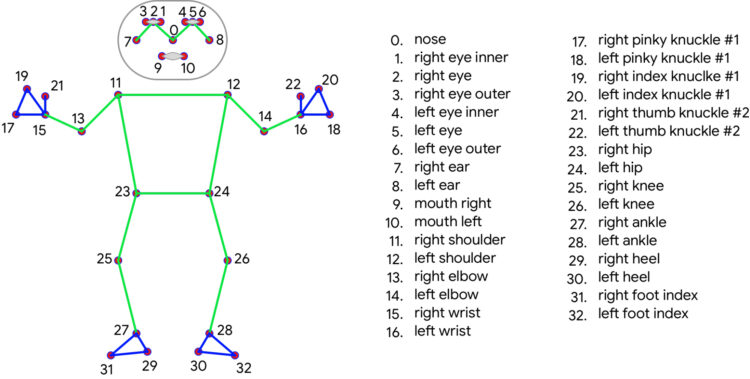

## Krok 1 - Zdjęcie wejściowe
* Zaproponuj zdjęcie jednego człowieka, w pełni widocznego w kadrze.
* Załaduj i wyswietl to zdjęcie.
* Zastanów się nad możliwymi źródłami zdjęć.

Na przykład:

```python
!wget https://sigmoidal.ai/wp-content/uploads/2023/07/roberto-carlos-o-melhor-do-mundo.jpg -q

img = cv2.imread("roberto-carlos-o-melhor-do-mundo.jpg")

img_width = img.shape[1]
img_height = img.shape[0]

fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
ax.imshow(img[...,::-1])
plt.show()
```

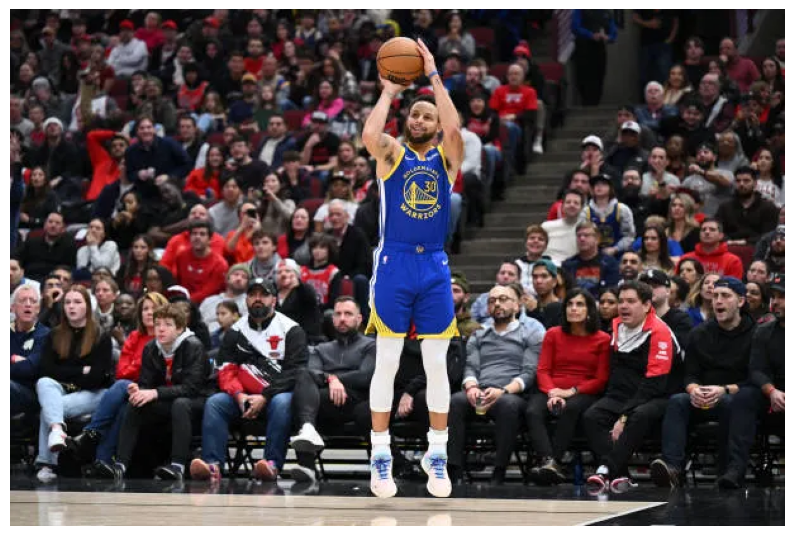

In [3]:
img = cv2.imread("stephen_curry.png")

img_width = img.shape[1]
img_height = img.shape[0]

fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
ax.imshow(img[..., ::-1])
plt.show()

## Krok 2 - Markery
* Przy pomocy `MediaPipe` pozyskaj markery ludzkiego ciała i wyrsuj je na zdjęciu.
* Wyswietl zmodyfikowane zdjecie

Na przykład:
```python
# Initializing the Pose and Drawing modules of MediaPipe.
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

with mp_pose.Pose(static_image_mode=True) as pose:
    """
    This function utilizes the MediaPipe library to detect and draw 'landmarks'
    (reference points) on an image. 'Landmarks' are points of interest
    that represent various body parts detected in the image.
    Args:
        static_image_mode: a boolean to inform if the image is static (True) or sequential (False).
    """
    # Make a copy of the original image.
    annotated_img = img.copy()
    # Processes the image.
    results = pose.process(img)

    ####################### TODO BLOCK
    # Set the circle radius for drawing the 'landmarks'.
    # The radius is scaled as a percentage of the image's dim/s.
    circle_radius = int("""FILL IT"""")
    ####################### TODO BLOCK

    # Specifies the drawing style for the 'landmarks'.
    point_spec = mp_drawing.DrawingSpec(color=(220, 100, 0), thickness=-1, circle_radius=circle_radius)
    # Draws the 'landmarks' on the image.
    mp_drawing.draw_landmarks(annotated_img,
                              landmark_list=results.pose_landmarks,
                              landmark_drawing_spec=point_spec)

```

In [4]:
# Initializing the Pose and Drawing modules of MediaPipe.
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

with mp_pose.Pose(
        static_image_mode=True,
        model_complexity=1,
        min_detection_confidence=0.5
) as pose:
    """
    This function utilizes the MediaPipe library to detect and draw 'landmarks'
    (reference points) on an image. 'Landmarks' are points of interest
    that represent various body parts detected in the image.
    Args:
        static_image_mode: a boolean to inform if the image is static (True) or sequential (False).
    """
    # Make a copy of the original image.
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    annotated_img = img.copy()
    # Processes the image.
    results = pose.process(img_rgb)

    # Set the circle radius for drawing the 'landmarks'.
    # The radius is scaled as a percentage of the image's dim/s.

    circle_radius = max(1, int(min(img_width, img_height) * 0.01))
    point_spec = mp_drawing.DrawingSpec(color=(220, 100, 0), thickness=-1, circle_radius=circle_radius)
    line_spec = mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2)

    # Draws the 'landmarks' on the image.
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(annotated_img,
                                  landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS,
                                  landmark_drawing_spec=point_spec,
                                  connection_drawing_spec=line_spec)

I0000 00:00:1763904793.994943    4175 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1763904793.998286    4232 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) Xe Graphics (TGL GT2)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1763904794.139017    4226 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1763904794.182526    4224 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/home/jerzy-boksa/Programming/Projects/university/term_3/rozpoznawanie_wzorcow/.venv/lib/python3.12/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be rem

## Krok 3 - Wyrysowanie konturów
* Wyrysuj kontury przy pomocy `mp_drawing.draw_landmarks`.
* Wyświetl zmodyfikowane zdjęcie.

```python
# Make a copy of the original image.
annotated_img = img.copy()
# Specifies the drawing style for landmark connections.
line_spec = mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2)
# Draws both the landmark points and connections.
mp_drawing.draw_landmarks(
annotated_img,
landmark_list=results.pose_landmarks,
connections=mp_pose.POSE_CONNECTIONS,
landmark_drawing_spec=point_spec,
connection_drawing_spec=line_spec
)
```


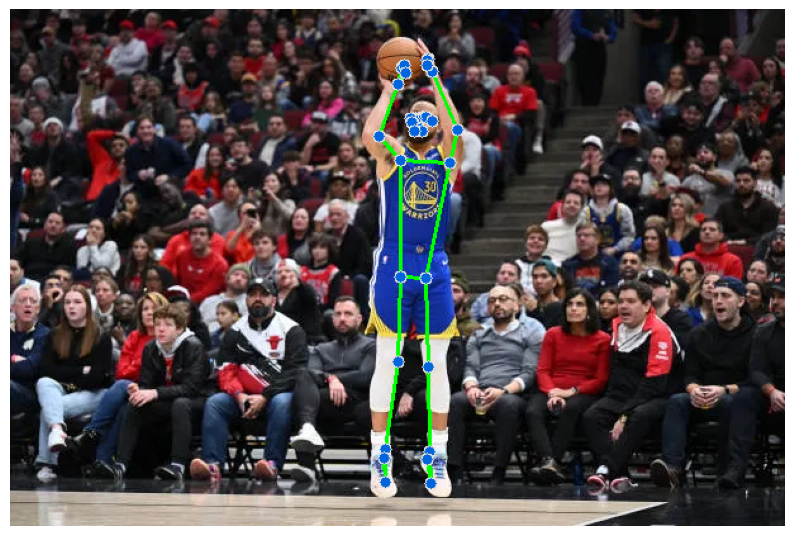

In [7]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))

## Krok 4 - Pozycje pikseli na obrazku
* Przy pomocy poniższego przykładu, wypisz pozycje wykrytych markerów opisujących lewą nogę.

```python
# Select the coordinates of the points of interest.
l_knee_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].x * img_width)
l_knee_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].y * img_height)

l_ankle_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].x * img_width)
l_ankle_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].y * img_height)

l_heel_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].x * img_width)
l_heel_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].y * img_height)

l_foot_index_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].x * img_width)
l_foot_index_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].y * img_height)

# Print the coordinates on the screen.
print(f"Left knee coordinates: ({l_knee_x}, {l_knee_y})")
print(f"Left ankle coordinates: ({l_ankle_x}, {l_ankle_y})")
print(f"Left heel coordinates: ({l_heel_x}, {l_heel_y})")
print(f"Left foot index coordinates: ({l_foot_index_x}, {l_foot_index_y})")
```

In [8]:
l_knee_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].x * img_width)
l_knee_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].y * img_height)

l_ankle_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].x * img_width)
l_ankle_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].y * img_height)

l_heel_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].x * img_width)
l_heel_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].y * img_height)

l_foot_index_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].x * img_width)
l_foot_index_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].y * img_height)

print(f"Left knee coordinates: ({l_knee_x}, {l_knee_y})")
print(f"Left ankle coordinates: ({l_ankle_x}, {l_ankle_y})")
print(f"Left heel coordinates: ({l_heel_x}, {l_heel_y})")
print(f"Left foot index coordinates: ({l_foot_index_x}, {l_foot_index_y})")

Left knee coordinates: (330, 282)
Left ankle coordinates: (331, 349)
Left heel coordinates: (329, 355)
Left foot index coordinates: (332, 374)


## Krok 5 - Zliczanie powtórzen
Wykorzystując argument `static_image_mode` dla `mp_pose.Pose` ([dokumentacja](https://github.com/google-ai-edge/mediapipe/blob/master/docs/solutions/pose.md#static_image_mode)) proszę przetworzyć dowolnie wybrany przez siebie filmik lub animację jednego człowieka.
* Na filmiku główny aktor powinien powtarzać jaką czynność (np. przysiady, pajacyki, pompki).
* Należy zaproponować taką analizę dostępnych markerów, aby zliczać powtórzenia wykonywanej czynności.
* "Pobawić się" gotowym rozwiazaniem PoC, zastanowić się jakie są jego zalety i wady.

### Zadanie: policzyć liczbę pompek na nagraniu

### Wynik końcowy

Gif, na którym są zaznaczone markery pozycji oraz licznik potwórzeń - dynamicznie się zmienia.

### Plan


1. Funkcja do wyciągania klatek: w argumencie przyjmuje ścieżkę, a zwraca listę "obrazków"
2. Funkcja pomocnicza, z listy obrazków tworzy gif'a i zapisuje na dysk
3. Funkcja, która wykrywa czy zostało wykonane w danej klatce powtórzenie
4. Funkcja która przekształca obrazki - dodaje do nich markery oraz licznik


### Wykrywanie powtórzeń

Pompki na nagraniu są "chyba" porządnie wykonane, zatem do funkcji która będzie wykonywać powtórzenie, pakujemy:
- aktualną klatkę
- klastkę następną

Jeśli pozycja y głowy w następnej klatce będzie "wyżej" niż aktualnej, oznacza to, że zostało wykonane powtórzenie.


In [5]:
from typing import List, Dict, Optional, Tuple

import numpy as np
from PIL import Image


In [14]:
INPUT_FILE = "pompki.mp4"

### mp4 To frames converter

In [6]:
def mp4_to_frames(mp4_path: str, convert_rgb: bool = True, max_frames: int | None = None) -> List[np.ndarray]:
    cap = cv2.VideoCapture(mp4_path)
    if not cap.isOpened():
        raise FileNotFoundError(f"Cannot open video: {mp4_path}")

    frames: List[np.ndarray] = []
    count = 0
    try:
        while True:
            if max_frames is not None and count >= max_frames:
                break
            ret, frame = cap.read()
            if not ret:
                break
            if convert_rgb:
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)
            count += 1
    finally:
        cap.release()

    return frames

### converting to gif

In [7]:
def convert_to_gif(frames: list[np.ndarray], output_path: str, fps: float = 10.0, loop: int = 0):
    pil_frames = [Image.fromarray(f.astype(np.uint8)) for f in frames]
    duration = 1000 / fps
    pil_frames[0].save(output_path, save_all=True, append_images=pil_frames[1:], loop=loop, duration=duration)


In [13]:
frames = mp4_to_frames(INPUT_FILE)

In [14]:
# test if func works
convert_to_gif(frames, "out2.gif", fps=60)

### pose detection

In [8]:
mp_pose = mp.solutions.pose


def detect_pose_landmarks_batch(
        frames: List[np.ndarray],
        model_complexity: int = 1,
        min_detection_confidence: float = 0.5
) -> List[Optional[List[Dict[str, any]]]]:
    results_list = []

    with mp_pose.Pose(
            static_image_mode=False,
            model_complexity=model_complexity,
            min_detection_confidence=min_detection_confidence,
            min_tracking_confidence=0.5
    ) as pose:
        for img in frames:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            h, w = img.shape[:2]
            results = pose.process(img_rgb)

            if not results.pose_landmarks:
                results_list.append(None)
                continue

            landmarks = []
            for idx, lm in enumerate(results.pose_landmarks.landmark):
                landmarks.append({
                    'id': idx,
                    'name': mp_pose.PoseLandmark(idx).name,
                    'x': int(lm.x * w),
                    'y': int(lm.y * h),
                    'z': lm.z,
                    'visibility': lm.visibility
                })
            results_list.append(landmarks)

    return results_list


def get_nose_coords(landmarks: List[Dict[str, any]]) -> Tuple:
    for l in landmarks:
        if l["name"] == "NOSE":
            x, y, z = l["x"], l["y"], l["z"]
            return x, y, z

    raise ValueError("No Nose in landmarks")

In [16]:
landmakrs_0 = detect_pose_landmarks_batch([frames[0]])
nose_coords_0 = get_nose_coords(landmakrs_0[0])

print(nose_coords_0)

I0000 00:00:1763902960.469189   21242 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1763902960.477689   21669 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) Xe Graphics (TGL GT2)
W0000 00:00:1763902960.648603   21659 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


(333, 118, -0.027175894007086754)


W0000 00:00:1763902960.692666   21664 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


### drawing landmarks on img

In [9]:
def draw_landmarks_from_list(
        img: np.ndarray,
        landmarks: List[Dict[str, any]],
        point_color: Tuple[int, int, int] = (220, 100, 0),
        point_radius: Optional[int] = 3,
        draw_connections: bool = True,
        line_color: Tuple[int, int, int] = (0, 255, 0),
        line_thickness: int = 1
) -> np.ndarray:
    annotated = img.copy()
    h, w, _ = img.shape

    if point_radius is None:
        point_radius = max(1, int(min(w, h) * 0.01))

    for lm in landmarks:
        cv2.circle(annotated, (lm['x'], lm['y']), point_radius, point_color, -1)

    if draw_connections:
        connections = mp_pose.POSE_CONNECTIONS
        for conn in connections:
            start_idx, end_idx = conn
            if start_idx < len(landmarks) and end_idx < len(landmarks):
                start = (landmarks[start_idx]['x'], landmarks[start_idx]['y'])
                end = (landmarks[end_idx]['x'], landmarks[end_idx]['y'])
                cv2.line(annotated, start, end, line_color, line_thickness)

    return annotated

In [10]:
def add_counter(img: np.ndarray, value: int = 0) -> np.ndarray:
    if img is None or img.size == 0:
        raise ValueError("Input image is empty.")

    annotated = img.copy()
    h, w = annotated.shape[:2]

    text = f"repetitions: {value}"
    font = cv2.FONT_HERSHEY_SIMPLEX

    font_scale = max(0.5, min(h, w) / 600.0)
    thickness = max(1, int(round(font_scale * 2)))
    margin = max(6, int(round(min(h, w) * 0.02)))
    pad = max(4, int(round(min(h, w) * 0.008)))

    (tw, th), baseline = cv2.getTextSize(text, font, font_scale, thickness)
    x1, y1 = margin, margin
    x2, y2 = x1 + tw + 2 * pad, y1 + th + 2 * pad

    overlay = annotated.copy()
    cv2.rectangle(overlay, (x1, y1), (x2, y2), (0, 0, 0), thickness=-1)
    alpha = 0.45
    annotated = cv2.addWeighted(overlay, alpha, annotated, 1 - alpha, 0)

    text_org = (x1 + pad, y1 + pad + th - baseline // 2)
    cv2.putText(annotated, text, text_org, font, font_scale, (255, 255, 255), thickness, cv2.LINE_AA)

    return annotated

In [21]:
with_landmakrs_0 = draw_landmarks_from_list(frames[0], landmakrs_0[0])
with_repetitions_0 = add_counter(with_landmakrs_0, value=5)
convert_to_gif([with_repetitions_0], "test.gif")

### rep detector

In [18]:
def is_repetition(current_nose_pose: Tuple, next_nose_pose: Tuple, threshold: int = 5) -> bool:
    if not next_nose_pose:
        return False

    _, current_y, _ = current_nose_pose
    _, next_y, _ = next_nose_pose

    vertical_change = current_y - next_y
    return vertical_change >= threshold

### full pipeline

In [23]:
import os

os.environ["GLOG_minloglevel"] = "3"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

from absl import logging

logging.set_verbosity(logging.ERROR)

In [11]:
def count_push_up_reps(mp4_file: str, gif_out: str):
    output_frames = []
    frames = mp4_to_frames(mp4_file)
    all_landmarks = detect_pose_landmarks_batch(frames)

    frames_count = len(frames)
    repetitions_count = 0
    print(f"Parsed {mp4_file} to {frames_count} frames")

    for i in range(frames_count - 1):
        current_frame = frames[i]
        current_landmarks = all_landmarks[i]
        next_landmarks = all_landmarks[i + 1]

        current_nose_pose = get_nose_coords(current_landmarks)
        next_nose_pose = get_nose_coords(next_landmarks)

        if is_repetition(current_nose_pose, next_nose_pose):
            repetitions_count += 1

        frame_with_landmarks = draw_landmarks_from_list(current_frame, current_landmarks)
        frame_with_landmarks_and_repetitions = add_counter(frame_with_landmarks, value=repetitions_count)

        output_frames.append(frame_with_landmarks_and_repetitions)

        if i % 100 == 0 or i == frames_count - 1:
            print(f"Frame {i}/{frames_count} processed. Repetitions: {repetitions_count}")

    convert_to_gif(output_frames, gif_out, fps=60)

In [ ]:
count_push_up_reps(INPUT_FILE, "first_try.gif")

I0000 00:00:1763905922.092597    4175 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1763905922.095043    5973 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) Xe Graphics (TGL GT2)
W0000 00:00:1763905922.213135    5966 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1763905922.240190    5963 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


### Result:

Wynik jest zapisany w gifie first_try.gif.

### Problem:


Przy takiej detekcji powtórzeń, podczas podnoszenia, są nabijane dodatkowe powtórzenia. Tzn. źle jest skonstruowana.

Modyfikacja, będizemy przekazywać 3 frame'y:

Poprzedni, środkowy, oraz następny i oczekumejy że środkowy jest "najniżej"

In [12]:
def is_repetition_better(prev_nose_pose: Tuple, current_nose_pose: Tuple, next_nose_pose: Tuple,
                         img_height: int, sensitivity: float = 0.004) -> bool:
    if not next_nose_pose:
        return False

    _, prev_y, _ = prev_nose_pose
    _, current_y, _ = current_nose_pose
    _, next_y, _ = next_nose_pose

    threshold = max(1.0, img_height * sensitivity)

    moved_down = (current_y - prev_y) >= 1
    moving_up = (current_y - next_y) >= 1

    return moved_down and moving_up


def count_push_up_reps_better(mp4_file: str, gif_out: str):
    output_frames = []
    frames = mp4_to_frames(mp4_file)
    all_landmarks = detect_pose_landmarks_batch(frames)

    frames_count = len(frames)
    repetitions_count = 0
    print(f"Parsed {mp4_file} to {frames_count} frames")

    for i in range(1, frames_count - 1):
        current_frame = frames[i]
        prev_landmarks = all_landmarks[i - 1]
        current_landmarks = all_landmarks[i]
        next_landmarks = all_landmarks[i + 1]

        current_nose_pose = get_nose_coords(current_landmarks)
        prev_nose_pose = get_nose_coords(prev_landmarks)
        next_nose_pose = get_nose_coords(next_landmarks)

        if is_repetition_better(prev_nose_pose, current_nose_pose, next_nose_pose, img_height=frames[0].shape[0], sensitivity=0.004):
            repetitions_count += 1

        frame_with_landmarks = draw_landmarks_from_list(current_frame, current_landmarks)
        frame_with_landmarks_and_repetitions = add_counter(frame_with_landmarks, value=repetitions_count)

        output_frames.append(frame_with_landmarks_and_repetitions)

        if i % 100 == 0 or i == frames_count - 1:
            print(f"Frame {i}/{frames_count} processed. Repetitions: {repetitions_count}")

    convert_to_gif(output_frames, gif_out, fps=60)

In [16]:
count_push_up_reps_better(INPUT_FILE, "second_try.gif")

I0000 00:00:1763905676.831851    4175 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1763905676.835140    5795 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) Xe Graphics (TGL GT2)
W0000 00:00:1763905676.984651    5789 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1763905677.024885    5788 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Parsed pompki.mp4 to 1543 frames
Frame 100/1543 processed. Repetitions: 0
Frame 200/1543 processed. Repetitions: 0
Frame 300/1543 processed. Repetitions: 0
Frame 400/1543 processed. Repetitions: 0
Frame 500/1543 processed. Repetitions: 0
Frame 600/1543 processed. Repetitions: 0
Frame 700/1543 processed. Repetitions: 0
Frame 800/1543 processed. Repetitions: 0
Frame 900/1543 processed. Repetitions: 0
Frame 1000/1543 processed. Repetitions: 2
Frame 1100/1543 processed. Repetitions: 2
Frame 1200/1543 processed. Repetitions: 2
Frame 1300/1543 processed. Repetitions: 3
Frame 1400/1543 processed. Repetitions: 3
Frame 1500/1543 processed. Repetitions: 5


Problemem w tym podejściu jest dobór threshold do wykrywania potwórzenia. Dalej są z tym problemy :(